# 고유 분해

정방 행렬 $A$에 대해서 다음 식을 만족하는 벡터 $v$, 실수 $\lambda$를 찾을 수 있다고 가정하자.

$$ Av = \lambda v $$

* $ A \in \mathbf{R}^{M \times M} $

* $ \lambda \in \mathbf{R} $

* $ v \in \mathbf{R}^{M} $

위 식을 만족하는 실수 $\lambda$를 **고유값**(eigenvalue), 단위 벡터 $v$ 를 **고유벡터**(eigenvector) 라고 하며 고유값과 고유벡터를 찾는 작업을 **고유 분해**(eigen-decomposition)라고 한다.

예를 들어 다음 행렬 $A$

$$
A=
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
$$
에 대해 다음 단위 벡터와 스칼라 값은 고유벡터-고유값이 된다.

$$\lambda = -1$$

$$
v=
\begin{bmatrix}
1  \\
1
\end{bmatrix}
$$

만약 행렬이 다음과 같다면,
$$ 
B =
\begin{bmatrix}
2 & 3 \\
2 & 1
\end{bmatrix}
$$

다음과 같은 두 가지 고유값-고유벡터를 가진다.

$$ 
\lambda_1 = 4, \;\;
v_1 = \begin{bmatrix}
3 \\
2
\end{bmatrix}
$$


$$ 
\lambda_2 = -1, \;\;
v_2 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}
$$

이 때 고유벡터 $v_1$, $v_2$와 방향이 같은 벡터는 모두 고유벡터가 되므로 보통은 크기가 1인 단위 벡터가 되도록 다음과 같이 정규화(normalization)을 해준다.

즉 첫번째 행렬 $A$에 대해서는

$$
v=
\begin{bmatrix}
\dfrac{1}{\sqrt{2}}  \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
$$

두번째 행렬 $B$에 대해서는
$$ 
\lambda_1 = 4, \;\;
v_1 = \begin{bmatrix}
\dfrac{3}{\sqrt{13}} \\
\dfrac{2}{\sqrt{13}}
\end{bmatrix}
$$


$$ 
\lambda_2 = -1, \;\;
v_2 = \begin{bmatrix}
-\dfrac{1}{\sqrt{2}} \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
$$



numpy linalg 서브패키지에서는 고유값과 고유벡터를 구할 수 있는 `eig` 명령을 제공한다.
고유값은 벡터의 형태로, 고유벡터는 고유벡터 행렬의 형태로 묶여서 나오면 고유벡터는 크기가 1되도록 이 정규화가 되어있다.

`eig` 명령의 결과로 나오는 고유벡터 행렬은 행이 아니라 열이 고유벡터라는 점에 주의한다.

In [107]:
w1, V1 = np.linalg.eig(np.array([[1, -2], [2, -3]]))

In [108]:
w1

array([-0.99999998, -1.00000002])

In [109]:
V1

array([[ 0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [110]:
w2, V2 = np.linalg.eig(np.array([[2, 3], [2, 1]]))

In [111]:
w2

array([ 4., -1.])

In [112]:
V2

array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]])

모든 행렬이 고유 분해가 가능한 것은 아니고 실수인 고유값이 존재하지 않는 행렬도 있다. 예를 들어 다음 행렬은 실수인 고유값이 존재하지 않는다.

$$ 
C =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$

하지만 이 경우에도 고유값이나 고유벡터의 정의를 복소수까지 확장하면 다음과 같이 고유 분해가 가능하다.

In [113]:
np.linalg.eig(np.array([[0, -1], [1, 0]]))

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

복소수와 중복 고유값을 사용하면 행렬 $ A \in \mathbf{R}^{M \times M} $에 대해 항상 $M$개의 고유값-고유벡터 쌍이 존재할 수 있다. 이를 각각 

$$ \lambda_1, \lambda_2, \cdots, \lambda_M \;\;\; v_1, v_2, \cdots, v_M $$

으로 표시하자. 이 고유값과 고유벡터를 묶어서 다음과 같이 고유벡터 행렬, 고유값 행렬을 정의할 수 있다. 

고유벡터 행렬 $V$은 고유벡터를 옆으로 쌓아서 만든 행렬이다.

$$
V = \left[ v_1 \cdots v_M \right], \;\;\; V \in \mathbf{R}^{M \times M}
$$


고유값 행렬 $\Lambda$은 고유 값을 대각 성분으로 가지는 대각 행렬이다.

$$
\Lambda =
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
, \;\;\; \Lambda \in \mathbf{R}^{M \times M}
$$

위와 같이 고유벡터과 행렬 고유값 행렬을 정의하면 다음과 같은 관계식을 얻을 수 있다.


$$ 
\begin{eqnarray}
AV 
&=& A \left[ v_1 \cdots v_M \right] \\
&=& \left[ A v_1 \cdots A v_M \right] \\
&=& \left[ \lambda_1 v_1 \cdots \lambda_M v_M \right] \\
&=& \left[ v_1 \cdots v_M \right] 
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
\\
&=& V\Lambda
\end{eqnarray}
$$

$$ AV = V\Lambda $$

## 대칭 행렬의 고유 분해

행렬 $A$가 대칭(symmetric) 행렬이면 고유벡터들이 서로 수직(orthogonal)이 된다. 즉, 고유벡터끼리의 내적이 0이 된다.

$$ u_i^T  u_j = 0 $$

이는 다음과 같이 증명할 수 있다.

서로 다른 고유값 $\lambda_i$,  $\lambda_j$ $(\lambda_i \neq \lambda_j)$ 에 대응하는 고유벡터 $v_i$, $v_j$를 생각하자.

$$
\begin{eqnarray}
\lambda_i u_i^T u_j
&=& (\lambda_i u_i)^T u_j \\
&=& (A u_i)^T u_j \\
&=& u_i^T A_T u_j \\
&=& u_i^T A u_j \\
&=& u_i^T \lambda_j u_j \\
&=& \lambda_j u_i^T  u_j \\
(\lambda_i - \lambda_j) u_i^T  u_j &=& 0 \\
 u_i^T  u_j &=& 0
\end{eqnarray}
$$

만약 고유벡터가 크기 1이 되도록 정규화된 상태라면 고유벡터 행렬 $V$는 다음과 같이 전치 행렬이 역행렬과 같아진다.

$$ V^T V = V V^T = I$$

$$ V^{-1} = V^T $$

따라서  행렬 $A$ 를 $M$개의 대칭 행렬 $A_i = v_i v_i^T$ 의 합으로 표시할 수 있다.

$$ A = V\Lambda V^T = \sum_{i=1}^{M} {\lambda_i} v_i v_i^T = \lambda_1 A_1 + \cdots + \lambda_M A_M $$

$$ \lambda_1 > \cdots > \lambda_M $$ 

$$ A^{-1} = V \Lambda^{-1} V^T = \sum_{i=1}^{M} \dfrac{1}{\lambda_i} v_i v_i^T = \dfrac{1}{\lambda_1} A_1 + \cdots + \dfrac{1}{\lambda_M} A_M $$

이 때 각 $A_i$의 크기는 모두 동일하기 때문에 가장 작은 고유값 몇개를 생략해도 원래의 행렬과 큰 차이가 나지 않을 수도 있다. 주성분 분석(PCA: Principal Component Analysis)에서는 고유 분해의 이러한 성질을 이용한다.

$$ A \approx \lambda_1 A_1 + \cdots + \lambda_{M-1} A_{M-1} $$

## 고유값과 양한정

만약 대칭 행렬의 고유값이 모두 양수이면 그 행렬은 양한정(positive definite)이 된다. 이는 다음과 같이 증명할 수 있다.

우선 고유 분해로 만들어진 행렬 $A_i = v_iv_i^T$는 양-반한정이다. $x$가 $v_i$와 수직인 경우에만 0이 된다.

$$ x^T A_i x = x^T v_iv_i^T x = (x^T v_i)^T(x^T v_i) = || x^T v_i || \geq 0 $$

여기에 양수인 고유값을 곱한 행렬 $\lambda_i A_i$도 마찬가지이다. 이러한 행렬들을 모두 더한 행렬 $\lambda_1 A_1 + \cdots + \lambda_M A_M $ 은 양한정이다. 왜나하면 모든 고유 벡터의 집합은 $M$ 차원에서 기저 벡터를 이루기 때문에 동시에 모든 기저 벡터와 수직인 벡터는 존재하지 않기 때문이다.

## 가우시안 정규 분포의 좌표 변환

확률 변수의 공분산 행렬 $\Sigma$ 은 대칭 행렬이므로 위의 관계가 성립하고 따라서 다변수 가우시안 정규 분포의 확률 밀도 함수는 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray}
\mathcal{N}(x \mid \mu, \Sigma) 
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
\end{eqnarray}
$$

즉 고유벡터 행렬 $V$ 를 변환 행렬로 사용하여 $x$ 를 $x' = V^T(x-\mu)$ 로 좌표 변환하면, 좌표 변환된 새로운 $x'$ 들의 공분산 행렬은 대각 행렬인 고유값 행렬 $\Lambda$ 가 된다. 즉 좌표 변환된 $x'$ 들은 서로 독립인 성분이 된다. 또한 고유벡터 행렬 $V$의 각 열, 즉 고유 벡터들은 독립인 성분을 가리키는 기저 벡터가 된다. 

이 사실도 나중에 주성분 분석에서 사용된다.

In [82]:
mu = [2, 3]
cov = [[4, 3],[3, 5]]

In [83]:
w, V = np.linalg.eig(cov)

In [84]:
w

array([ 1.45861873,  7.54138127])

In [85]:
V

array([[-0.76301998, -0.6463749 ],
       [ 0.6463749 , -0.76301998]])

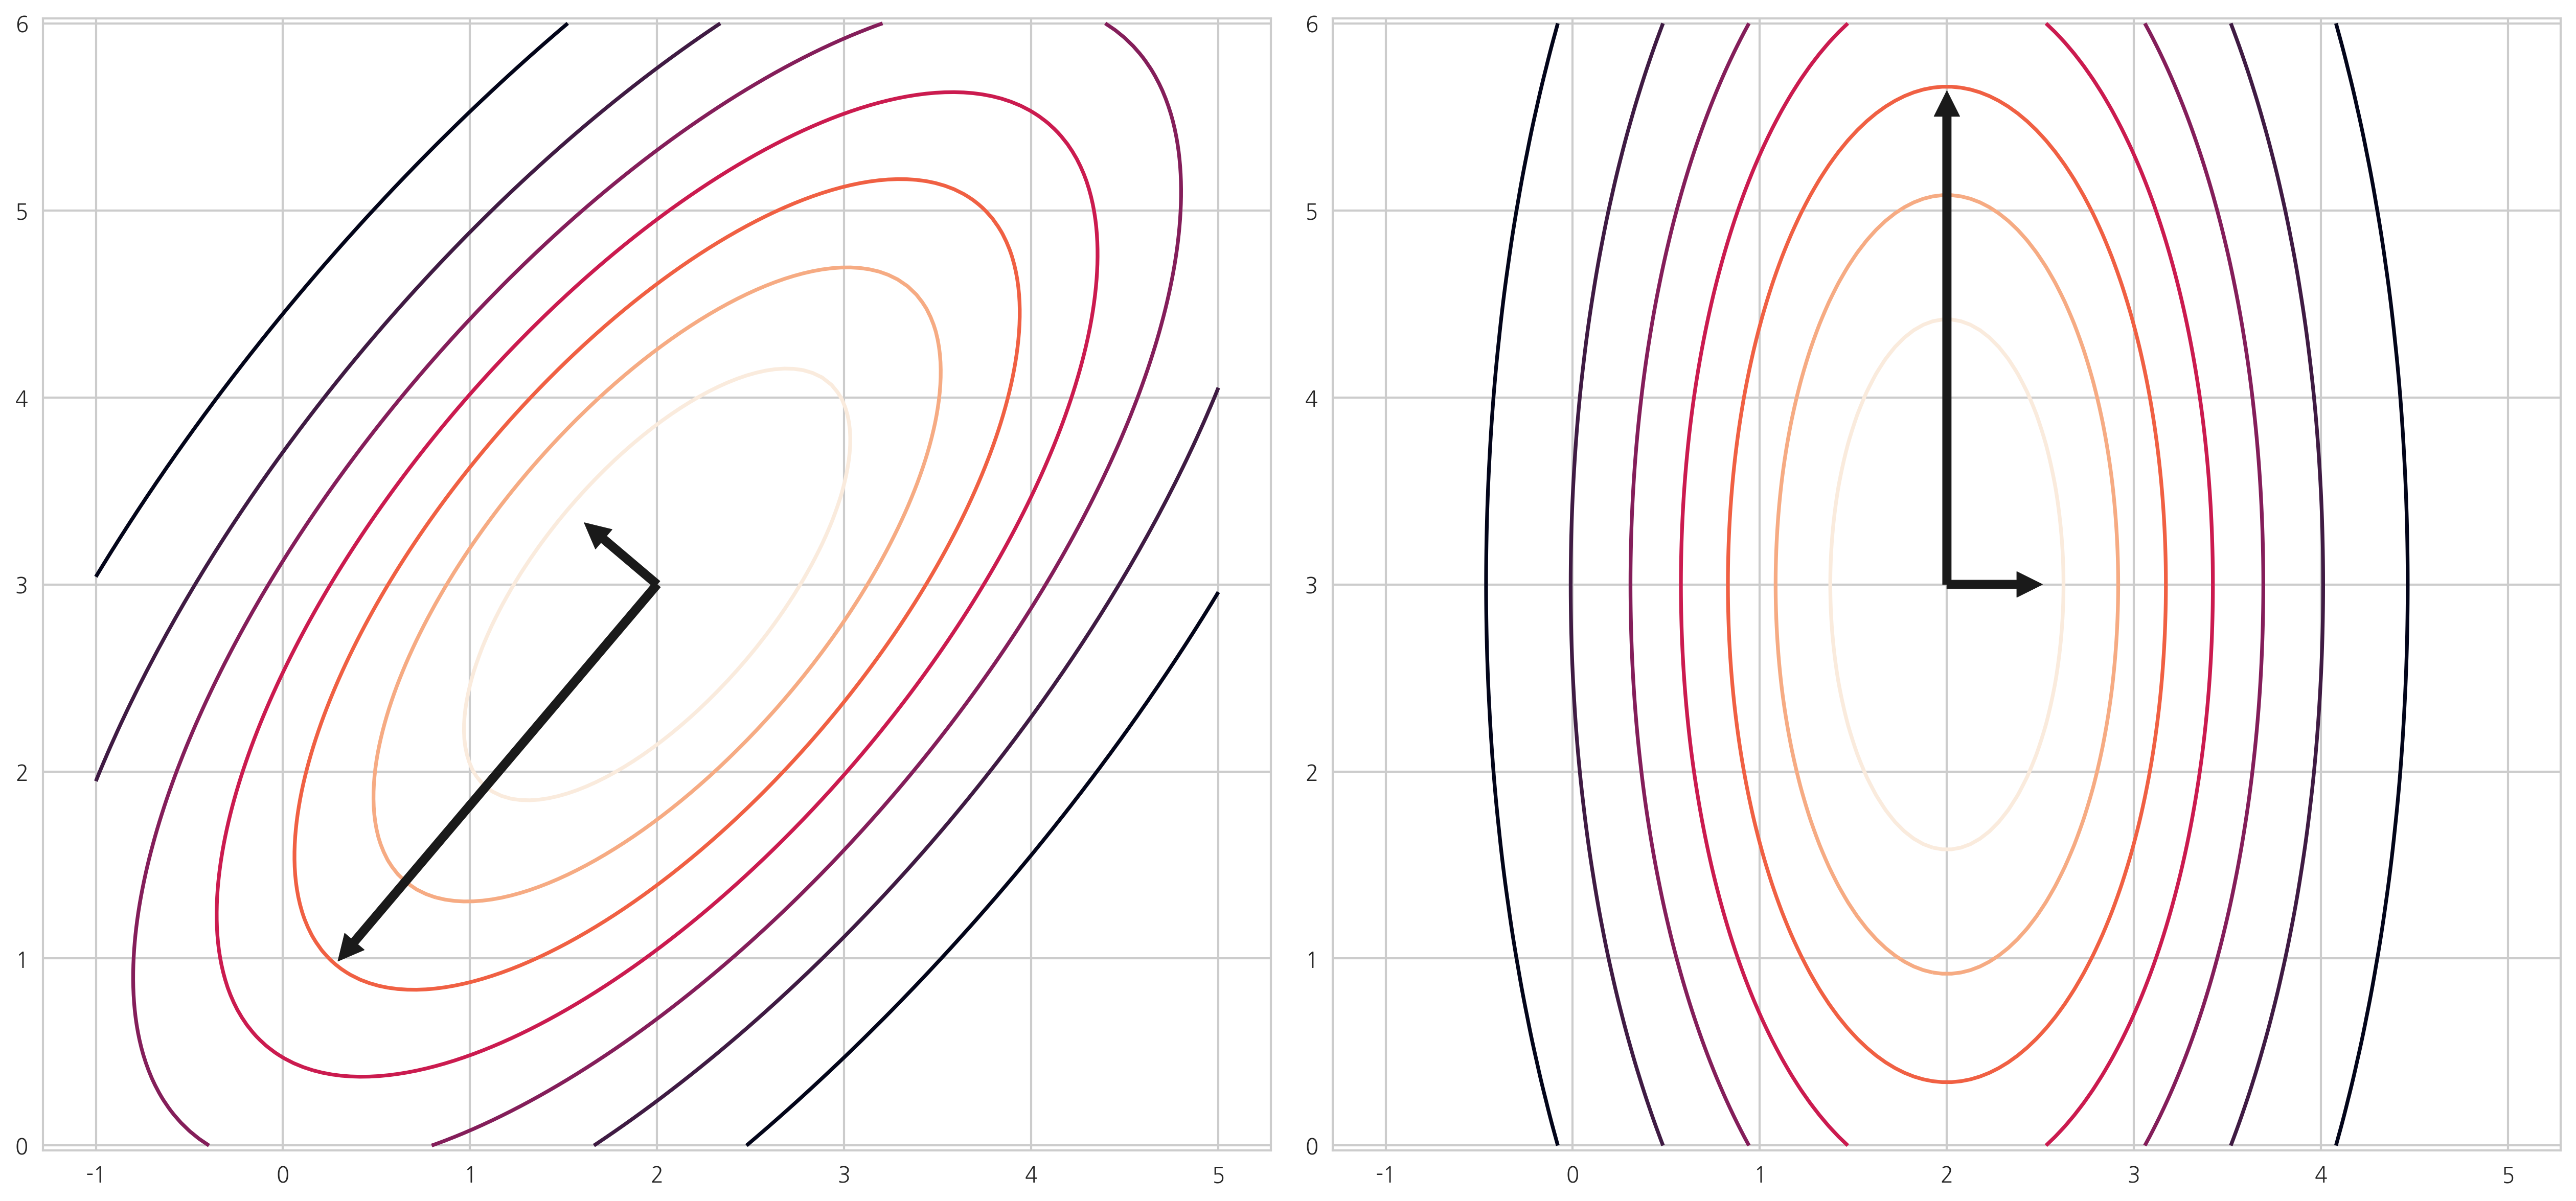

In [103]:
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.figure(figsize=(17, 8))

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * V[:,0]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * V[:,1]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w) # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.tight_layout()
plt.show()